## AgeBinned Phase 5 (Evaluation)

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 15](https://data-science.training/kapitel-15/)
* Datum: 23.03.2023

Version 2

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions_multiclass as sfm

In [5]:
# Datenversion festlegen: 2
version  = 2
# Modell-Abkürzung festlegen:
#  knn = k-nearest Neighbor
#  nb  = Naive Bayes
#  dt  = Decision Tree
#  mlp = Multilayer Perceptron
#  svm = Support Vector Machines
#  lr  = Logistic Regression 
#  rf  = Random Forest
#  gb  = Gradient Boosting
shortcut = 'gb'

In [6]:
# Testdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/age/test_v' + str(version) + '.xlsx'
df_test  = pd.read_excel(filename)

In [7]:
# Dataframe anzeigen (wegen Indizes)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             105 non-null    int64  
 1   Parch             105 non-null    int64  
 2   Fare              105 non-null    float64
 3   TicketCount       105 non-null    int64  
 4   LogFare           105 non-null    float64
 5   FirstnameMeanAge  105 non-null    float64
 6   Pclass_2          105 non-null    int64  
 7   Pclass_3          105 non-null    int64  
 8   Sex_male          105 non-null    int64  
 9   Embarked_Q        105 non-null    int64  
 10  Embarked_S        105 non-null    int64  
 11  Title_Master      105 non-null    int64  
 12  Title_Miss        105 non-null    int64  
 13  Title_Mrs         105 non-null    int64  
 14  Title_Rare        105 non-null    int64  
 15  AgeBinned         105 non-null    object 
dtypes: float64(3), int64(12), object(1)
memory u

In [8]:
# Testdaten: Daten ohne AgeBinned extrahieren
X_test = df_test.iloc[:,0:15].values
#  Lösung (AgeBinned) extrahieren
y_true = df_test.iloc[:,15].values

In [9]:
# Klassen (Reihenfolge beachten!)
#labels = df_test['AgeBinned'].unique()
labels = ['Child', 'Teenage', 'Young', 'Adult', 'Middle', 'Senior']

In [10]:
# Modell laden
#  (KNIME: "PMML Reader")
filename = '../../models/titanic/age/' + shortcut + '_v' + str(version)
model = pk.load(open(filename, 'rb'))


Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 55.2381 % |
| Makro-F-Maß  | (F-Score)     | 52.3501 % |
| AURC         | (AURC)        | 82.0611 % |
| LogLoss      | (LogLoss)     | 1.2556   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 71.4286 | 83.3333 | 76.9231 |
| Teenage | 50.0 | 28.5714 | 36.3636 |
| Young | 55.814 | 70.5882 | 62.3377 |
| Adult | 57.1429 | 41.3793 | 48.0 |
| Middle | 52.1739 | 63.1579 | 57.1429 |
| Senior | 33.3333 | 33.3333 | 33.3333 |
|--------|-----------|--------|-------|
| Makro  | 53.3154 | 53.3939 | 52.3501 |


Confusion Matrix



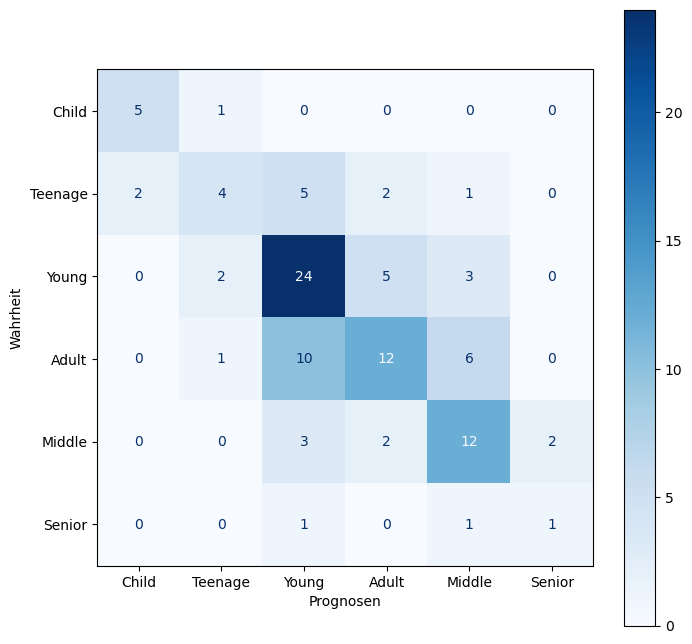

In [11]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Predictor", "Scorer")
scores = sfm.dst_scores_multi_trained_model(model, X_test, y_true, labels=labels)
sfm.dst_display_scores_multi(scores, labels=labels)

## Ergebnisse

### Version 2

####  knn = k-nearest Neighbor

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 43.8095 % |
| Makro-F-Maß  | (F-Score)     | 38.8978 % |
| AURC         | (AURC)        | 75.2355 % |
| LogLoss      | (LogLoss)     | 7.2492   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 80.0 | 66.6667 | 72.7273 |
| Teenage | 27.2727 | 21.4286 | 24.0 |
| Young | 45.9459 | 50.0 | 47.8873 |
| Adult | 45.1613 | 48.2759 | 46.6667 |
| Middle | 42.1053 | 42.1053 | 42.1053 |
| Senior | 0.0 | 0.0 | 0.0 |
|--------|-----------|--------|-------|
| Makro  | 40.0809 | 38.0794 | 38.8978 |

####  nb = Naive Bayes

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 37.1429 % |
| Makro-F-Maß  | (F-Score)     | 36.1024 % |
| AURC         | (AURC)        | 72.4933 % |
| LogLoss      | (LogLoss)     | 2.7964   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 35.7143 | 83.3333 | 50.0 |
| Teenage | 18.1818 | 14.2857 | 16.0 |
| Young | 38.6364 | 50.0 | 43.5897 |
| Adult | 40.0 | 13.7931 | 20.5128 |
| Middle | 41.6667 | 52.6316 | 46.5116 |
| Senior | 50.0 | 33.3333 | 40.0 |
|--------|-----------|--------|-------|
| Makro  | 37.3665 | 41.2295 | 36.1024 |


####  dt = Decision Tree

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 50.4762 % |
| Makro-F-Maß  | (F-Score)     | 49.1545 % |
| AURC         | (AURC)        | 69.8893 % |
| LogLoss      | (LogLoss)     | 17.5267   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 71.4286 | 83.3333 | 76.9231 |
| Teenage | 38.4615 | 35.7143 | 37.037 |
| Young | 50.0 | 44.1176 | 46.875 |
| Adult | 52.7778 | 65.5172 | 58.4615 |
| Middle | 53.3333 | 42.1053 | 47.0588 |
| Senior | 25.0 | 33.3333 | 28.5714 |
|--------|-----------|--------|-------|
| Makro  | 48.5002 | 50.6869 | 49.1545 |

####  mlp = Multilayer Perceptron

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 41.9048 % |
| Makro-F-Maß  | (F-Score)     | 41.6565 % |
| AURC         | (AURC)        | 78.315 % |
| LogLoss      | (LogLoss)     | 1.298   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 71.4286 | 83.3333 | 76.9231 |
| Teenage | 20.0 | 14.2857 | 16.6667 |
| Young | 43.4783 | 58.8235 | 50.0 |
| Adult | 46.1538 | 20.6897 | 28.5714 |
| Middle | 38.4615 | 52.6316 | 44.4444 |
| Senior | 33.3333 | 33.3333 | 33.3333 |
|--------|-----------|--------|-------|
| Makro  | 42.1426 | 43.8495 | 41.6565 |


####  svm = Support Vector Machines

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 42.8571 % |
| Makro-F-Maß  | (F-Score)     | 31.2711 % |
| AURC         | (AURC)        | 76.1619 % |
| LogLoss      | (LogLoss)     | 1.3028   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 66.6667 | 66.6667 | 66.6667 |
| Teenage | 0.0 | 0.0 | 0.0 |
| Young | 42.3729 | 73.5294 | 53.7634 |
| Adult | 37.5 | 10.3448 | 16.2162 |
| Middle | 40.625 | 68.4211 | 50.9804 |
| Senior | 0.0 | 0.0 | 0.0 |
|--------|-----------|--------|-------|
| Makro  | 31.1941 | 36.4937 | 31.2711 |

####  lr = Logistic Regression

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 44.7619 % |
| Makro-F-Maß  | (F-Score)     | 36.8416 % |
| AURC         | (AURC)        | 74.9037 % |
| LogLoss      | (LogLoss)     | 1.3498   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 66.6667 | 66.6667 | 66.6667 |
| Teenage | 22.2222 | 14.2857 | 17.3913 |
| Young | 44.898 | 64.7059 | 53.012 |
| Adult | 63.6364 | 24.1379 | 35.0 |
| Middle | 40.0 | 63.1579 | 48.9796 |
| Senior | 0.0 | 0.0 | 0.0 |
|--------|-----------|--------|-------|
| Makro  | 39.5705 | 38.8257 | 36.8416 |

*andere Hardware*

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 42.8571 % |
| Makro-F-Maß  | (F-Score)     | 35.6283 % |
| AURC         | (AURC)        | 74.8975 % |
| LogLoss      | (LogLoss)     | 1.3486   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 66.6667 | 66.6667 | 66.6667 |
| Teenage | 22.2222 | 14.2857 | 17.3913 |
| Young | 44.898 | 64.7059 | 53.012 |
| Adult | 58.3333 | 24.1379 | 34.1463 |
| Middle | 35.7143 | 52.6316 | 42.5532 |
| Senior | 0.0 | 0.0 | 0.0 |
|--------|-----------|--------|-------|
| Makro  | 37.9724 | 37.0713 | 35.6283 |

####  rf = Random Forest

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 49.5238 % |
| Makro-F-Maß  | (F-Score)     | 48.1327 % |
| AURC         | (AURC)        | 81.8459 % |
| LogLoss      | (LogLoss)     | 1.859   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 62.5 | 83.3333 | 71.4286 |
| Teenage | 33.3333 | 28.5714 | 30.7692 |
| Young | 55.2632 | 61.7647 | 58.3333 |
| Adult | 40.0 | 34.4828 | 37.037 |
| Middle | 57.8947 | 57.8947 | 57.8947 |
| Senior | 33.3333 | 33.3333 | 33.3333 |
|--------|-----------|--------|-------|
| Makro  | 47.0541 | 49.8967 | 48.1327 |

####  gb = Gradient Boosting

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 55.2381 % |
| Makro-F-Maß  | (F-Score)     | 52.3501 % |
| AURC         | (AURC)        | 82.068 % |
| LogLoss      | (LogLoss)     | 1.2554   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 71.4286 | 83.3333 | 76.9231 |
| Teenage | 50.0 | 28.5714 | 36.3636 |
| Young | 55.814 | 70.5882 | 62.3377 |
| Adult | 57.1429 | 41.3793 | 48.0 |
| Middle | 52.1739 | 63.1579 | 57.1429 |
| Senior | 33.3333 | 33.3333 | 33.3333 |
|--------|-----------|--------|-------|
| Makro  | 53.3154 | 53.3939 | 52.3501 |
